In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
request_reply_df = pd.read_csv("./data/requestreply.csv", header=None)
reply_reply_df = pd.read_csv("./data/replyreply.csv", header=None)

In [3]:
request_reply_df.describe()

,2,3,4,5,6,7,8,9,10,11,...,92,93,94,95,96,97,98,99,100,101
count,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,...,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000
mean,168.552801,80.671077,38.756572,32.053867,30.741587,29.762200,29.199574,27.477508,26.854041,25.994097,...,25.061934,25.304607,25.449759,25.352015,25.144316,25.101272,26.139811,26.930865,28.847339,33.734174
std,143.484703,139.634386,124.942185,115.652077,108.482573,103.805790,114.714679,104.206368,100.228591,97.246000,...,103.891678,103.689839,104.585712,104.140811,105.343442,105.831126,108.482392,113.407518,149.541268,157.315308
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,110.203981,10.664463,7.254362,6.472051,6.865978,6.719649,6.819010,6.800115,6.838262,6.684005,...,6.622315,6.737947,6.783962,6.749630,6.704092,6.692827,6.615638,6.826102,6.601989,6.671906
50%,125.361919,27.813911,11.111021,9.940505,10.165453,10.082960,10.182023,10.108947,10.139465,10.075569,...,10.021448,10.118008,10.111928,10.084033,10.094404,10.052443,10.025501,10.061979,10.042549,10.014534
75%,216.209472,114.264309,19.995451,15.584529,15.759706,15.511990,15.537262,15.574992,15.710831,15.468359,...,15.242099,15.369892,15.529871,15.397132,15.461623,15.429079,15.504480,15.425980,15.324474,15.388250
max,5317.913055,5216.073036,5111.930847,5008.516073,4904.536963,4800.885916,6366.826057,6265.555143,6161.940098,6053.858995,...,8872.637033,8973.212957,9074.537039,9175.518036,9275.300026,9375.156164,9476.207972,9576.614857,9934.896946,10035.484076


In [4]:
request_reply_df.rename(columns={0:'Malicious'}, inplace=True)

In [5]:
request_reply_df["Malicious"].replace('legit', 0, inplace=True)
request_reply_df["Malicious"].replace('malware', 1, inplace=True)

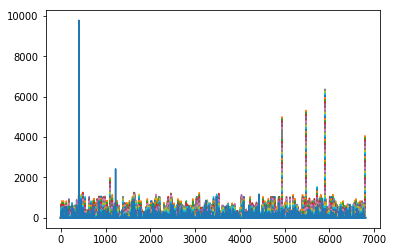

In [6]:
benignware = request_reply_df.loc[request_reply_df["Malicious"] == 0]
benignware.plot(legend=False)

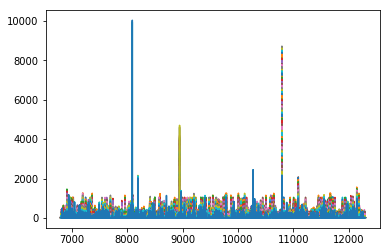

In [7]:
malware = request_reply_df.loc[request_reply_df["Malicious"] == 1]
malware.plot(legend=False)

In [8]:
from prototype_model import *

In [9]:
features = generate_features(request_reply_df)
model = build_fc_model(features)
fc_qr_history, fc_qr_results = train_model(model, request_reply_df)

Epoch 1/15


W0927 09:34:45.173693 4454487488 deprecation.py:323] From /Users/egalinkin/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


99/99 [==============================] - 3s 27ms/step - loss: 2.3413 - accuracy: 0.5155
Epoch 2/15
99/99 [==============================] - 1s 11ms/step - loss: 1.0146 - accuracy: 0.5577
Epoch 3/15
99/99 [==============================] - 1s 11ms/step - loss: 0.7993 - accuracy: 0.5850
Epoch 4/15
99/99 [==============================] - 1s 10ms/step - loss: 0.6861 - accuracy: 0.6231
Epoch 5/15
99/99 [==============================] - 1s 10ms/step - loss: 0.6281 - accuracy: 0.6514
Epoch 6/15
99/99 [==============================] - 1s 10ms/step - loss: 0.6035 - accuracy: 0.6687
Epoch 7/15
99/99 [==============================] - 1s 10ms/step - loss: 0.5906 - accuracy: 0.6804
Epoch 8/15
99/99 [==============================] - 1s 10ms/step - loss: 0.5626 - accuracy: 0.7028
Epoch 9/15
99/99 [==============================] - 1s 10ms/step - loss: 0.5344 - accuracy: 0.7171
Epoch 10/15
99/99 [==============================] - 1s 10ms/step - loss: 0.5145 - accuracy: 0.7380
Epoch 11/15
99/99 [=

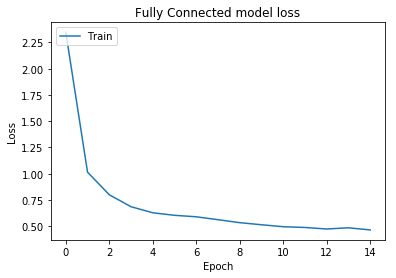

In [10]:
plt.plot(fc_qr_history.history['loss'])
plt.title('Fully Connected model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [11]:
# features = generate_features(reply_reply_df)
# model = build_fc_model(features)
# fc_rr_history, fc_rr_results = train_model(model, reply_reply_df)

In [12]:
# plt.plot(fc_rr_history.history['loss'])
# # plt.plot(fc_rr_history.history['val_accuracy'])
# plt.title('Fully Connected model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [13]:
features = generate_features(request_reply_df)
model = build_conv_model(features)
conv_qr_history, conv_qr_results = train_model(model, request_reply_df)

W0927 09:35:03.302563 4454487488 base_layer.py:1772] Layer sequential_1 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/15
99/99 [==============================] - 4s 37ms/step - loss: 0.6644 - accuracy: 0.6341
Epoch 2/15
99/99 [==============================] - 2s 18ms/step - loss: 0.5630 - accuracy: 0.7135
Epoch 3/15
99/99 [==============================] - 2s 18ms/step - loss: 0.5315 - accuracy: 0.7383
Epoch 4/15
99/99 [==============================] - 2s 18ms/step - loss: 0.5086 - accuracy: 0.7515
Epoch 5/15
99/99 [==============================] - 2s 17ms/step - loss: 0.4805 - accuracy: 0.7703
Epoch 6/15
99/99 [==============================] - 2s 17ms/step - loss: 0.4629 - accuracy: 0.7837
Epoch 7/15
99/99 [==============================] - 2s 17ms/step - loss: 0.4451 - accuracy: 0.7960
Epoch 8/15
99/99 [==============================] - 2s 18ms/step - loss: 0.4216 - accuracy: 0.8076
Epoch 9/15
99/99 [==============================] - 2s 17ms/step - loss: 0.4054 - accuracy: 0.8153
Epoch 10/15
99/99 [==============================] - 2s 17ms/step - loss: 0.3942 - accuracy: 0.8198
Epoch 11/

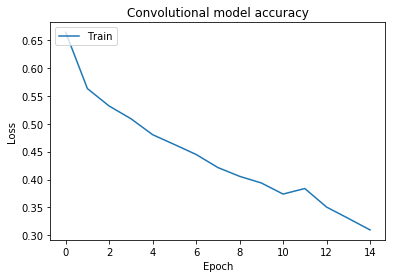

In [14]:
plt.plot(conv_qr_history.history['loss'])
# plt.plot(conv_qr_history.history['val_accuracy'])
plt.title('Convolutional model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [15]:
# features = generate_features(reply_reply_df)
# model = build_conv_model(features)
# conv_rr_history, conv_rr_results = train_model(model, reply_reply_df)

In [16]:
# plt.plot(conv_rr_history.history['accuracy'])
# # plt.plot(conv_rr_history.history['val_accuracy'])
# plt.title('Convolutional model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [18]:
dataset = request_reply_df.copy()
labels = dataset.pop("Malicious")
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=.2)

In [19]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
predictions = clf.predict(X_test)

In [21]:
errors = [0 if p == label else 1 for p, label in zip(predictions, y_test)]
accuracy = 1 - (np.sum(errors)/len(errors))
print("Accuracy of random forest classifier:" + str(accuracy))

Accuracy of random forest classifier:0.7926829268292683


In [22]:
features = generate_features(request_reply_fourier)
model = build_fc_model(features)
fourier_fc_qr_history, fourier_fc_qr_results = train_model(model, request_reply_fourier)

Epoch 1/15
99/99 [==============================] - 3s 27ms/step - loss: 354.8114 - accuracy: 0.4891
Epoch 2/15
99/99 [==============================] - 1s 10ms/step - loss: 145.6983 - accuracy: 0.5039
Epoch 3/15
99/99 [==============================] - 1s 10ms/step - loss: 89.2099 - accuracy: 0.5032
Epoch 4/15
99/99 [==============================] - 1s 10ms/step - loss: 55.6196 - accuracy: 0.5086
Epoch 5/15
99/99 [==============================] - 1s 10ms/step - loss: 39.5703 - accuracy: 0.5074
Epoch 6/15
99/99 [==============================] - 1s 10ms/step - loss: 27.8539 - accuracy: 0.5099
Epoch 7/15
99/99 [==============================] - 1s 10ms/step - loss: 21.0557 - accuracy: 0.5203
Epoch 8/15
99/99 [==============================] - 1s 10ms/step - loss: 18.7191 - accuracy: 0.5179
Epoch 9/15
99/99 [==============================] - 1s 10ms/step - loss: 14.8023 - accuracy: 0.5225
Epoch 10/15
99/99 [==============================] - 1s 10ms/step - loss: 14.1107 - accuracy: 0.51

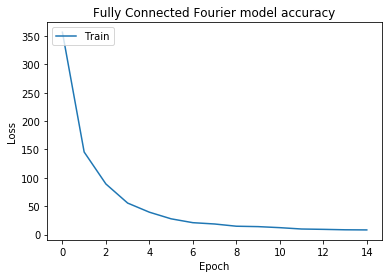

In [23]:
plt.plot(fourier_fc_qr_history.history['loss'])
# plt.plot(fourier_fc_qr_history.history['val_accuracy'])
plt.title('Fully Connected Fourier model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [24]:
features = generate_features(request_reply_fourier)
model = build_conv_model(features)
fourier_conv_qr_history, fourier_conv_qr_results = train_model(model, request_reply_fourier)

Epoch 1/15
99/99 [==============================] - 4s 36ms/step - loss: 0.7330 - accuracy: 0.5014
Epoch 2/15
99/99 [==============================] - 2s 16ms/step - loss: 0.6935 - accuracy: 0.5433
Epoch 3/15
99/99 [==============================] - 2s 17ms/step - loss: 0.6907 - accuracy: 0.5463
Epoch 4/15
99/99 [==============================] - 2s 16ms/step - loss: 0.6882 - accuracy: 0.5454
Epoch 5/15
99/99 [==============================] - 2s 17ms/step - loss: 0.6865 - accuracy: 0.5503
Epoch 6/15
99/99 [==============================] - 2s 17ms/step - loss: 0.6881 - accuracy: 0.5476
Epoch 7/15
99/99 [==============================] - 2s 17ms/step - loss: 0.6839 - accuracy: 0.5528
Epoch 8/15
99/99 [==============================] - 2s 17ms/step - loss: 0.6822 - accuracy: 0.5534
Epoch 9/15
99/99 [==============================] - 2s 16ms/step - loss: 0.6816 - accuracy: 0.5490
Epoch 10/15
99/99 [==============================] - 2s 16ms/step - loss: 0.6807 - accuracy: 0.5543
Epoch 11/

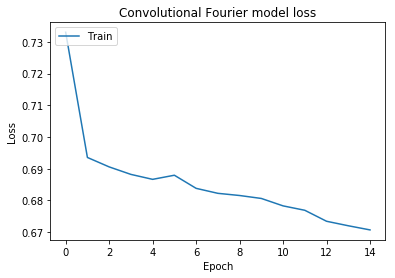

In [25]:
plt.plot(fourier_conv_qr_history.history['loss'])
# plt.plot(fourier_conv_qr_history.history['val_accuracy'])
plt.title('Convolutional Fourier model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [26]:
features = generate_features(request_reply_wavelet)
model = build_fc_model(features)
wavelet_fc_qr_history, wavelet_fc_qr_results = train_model(model, request_reply_wavelet)

W0927 09:36:31.336122 4454487488 base_layer.py:1772] Layer sequential_4 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/15
99/99 [==============================] - 3s 27ms/step - loss: 1.8306 - accuracy: 0.5274
Epoch 2/15
99/99 [==============================] - 1s 10ms/step - loss: 0.8467 - accuracy: 0.5761
Epoch 3/15
99/99 [==============================] - 1s 10ms/step - loss: 0.6995 - accuracy: 0.6167
Epoch 4/15
99/99 [==============================] - 1s 9ms/step - loss: 0.6369 - accuracy: 0.6570
Epoch 5/15
99/99 [==============================] - 1s 10ms/step - loss: 0.5907 - accuracy: 0.6827
Epoch 6/15
99/99 [==============================] - 1s 9ms/step - loss: 0.5596 - accuracy: 0.7072
Epoch 7/15
99/99 [==============================] - 1s 9ms/step - loss: 0.5346 - accuracy: 0.7274
Epoch 8/15
99/99 [==============================] - 1s 10ms/step - loss: 0.5146 - accuracy: 0.7409
Epoch 9/15
99/99 [==============================] - 1s 9ms/step - loss: 0.4934 - accuracy: 0.7553
Epoch 10/15
99/99 [==============================] - 1s 9ms/step - loss: 0.4787 - accuracy: 0.7661
Epoch 11/15
99

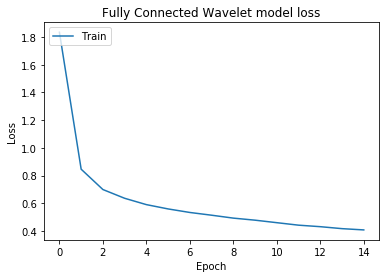

In [27]:
plt.plot(wavelet_fc_qr_history.history['loss'])
plt.title('Fully Connected Wavelet model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [28]:
# features = generate_features(reply_reply_wavelet)
# model = build_fc_model(features)
# wavelet_fc_rr_history, wavelet_fc_rr_results = train_model(model, reply_reply_wavelet)

In [29]:
# plt.plot(wavelet_fc_rr_history.history['accuracy'])
# plt.plot(wavelet_fc_rr_history.history['val_accuracy'])
# plt.title('Fully Connected Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [30]:
features = generate_features(request_reply_wavelet)
model = build_conv_model(features)
wavelet_conv_qr_history, wavelet_conv_qr_results = train_model(model, request_reply_wavelet)

W0927 09:36:49.295767 4454487488 base_layer.py:1772] Layer sequential_5 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/15
99/99 [==============================] - 4s 37ms/step - loss: 0.6748 - accuracy: 0.6329
Epoch 2/15
99/99 [==============================] - 2s 17ms/step - loss: 0.5694 - accuracy: 0.7117
Epoch 3/15
99/99 [==============================] - 2s 17ms/step - loss: 0.5315 - accuracy: 0.7340
Epoch 4/15
99/99 [==============================] - 2s 17ms/step - loss: 0.5034 - accuracy: 0.7542
Epoch 5/15
99/99 [==============================] - 2s 17ms/step - loss: 0.4700 - accuracy: 0.7766
Epoch 6/15
99/99 [==============================] - 2s 17ms/step - loss: 0.4515 - accuracy: 0.7863
Epoch 7/15
99/99 [==============================] - 2s 16ms/step - loss: 0.4322 - accuracy: 0.8005
Epoch 8/15
99/99 [==============================] - 2s 17ms/step - loss: 0.4067 - accuracy: 0.8143
Epoch 9/15
99/99 [==============================] - 2s 17ms/step - loss: 0.3864 - accuracy: 0.8286
Epoch 10/15
99/99 [==============================] - 2s 17ms/step - loss: 0.3632 - accuracy: 0.8426
Epoch 11/

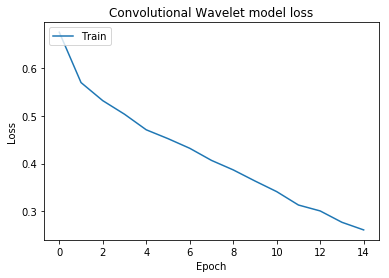

In [31]:
plt.plot(wavelet_conv_qr_history.history['loss'])
plt.title('Convolutional Wavelet model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [32]:
# features = generate_features(reply_reply_wavelet)
# model = build_conv_model(features)
# wavelet_conv_rr_history, wavelet_conv_rr_results = train_model(model, reply_reply_wavelet)

In [33]:
# plt.plot(wavelet_conv_rr_history.history['accuracy'])
# plt.plot(wavelet_conv_rr_history.history['val_accuracy'])
# plt.title('Convolutional Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [34]:
print("==================================================")
print("=                Overall results                ==")
print("==================================================")
print("    *Request-reply data*")
print("    Fully-Connected test accuracy: {}".format(fc_qr_results[1]))
print("    Convolutional test accuracy: {}".format(conv_qr_results[1]))
print("    Fourier f-c test accuracy: {}".format(fourier_fc_qr_results[1]))
print("    Fourier conv test accuracy: {}".format(fourier_conv_qr_results[1]))
print("    Wavelet f-c test accuracy: {}".format(wavelet_fc_qr_results[1]))
print("    Wavelet conv test accuracy: {}".format(wavelet_conv_qr_results[1]))
print("    Random Forest (control) test accuracy: {}".format(accuracy))
# print("    *Reply-reply data*")
# print("    Fully-Connected test accuracy: {}".format(fc_rr_results[1]))
# print("    Convolutional test accuracy: {}".format(conv_rr_results[1]))
# print("    Fourier f-c test accuracy: {}".format(fourier_fc_rr_results[1]))
# print("    Fourier conv test accuracy: {}".format(fourier_conv_rr_results[1]))
# print("    Wavelet f-c test accuracy: {}".format(wavelet_fc_rr_results[1]))
# print("    Wavelet conv test accuracy: {}".format(wavelet_conv_rr_results[1]))

=                Overall results                ==
    *Request-reply data*
    Fully-Connected test accuracy: 0.6162601709365845
    Convolutional test accuracy: 0.7512195110321045
    Fourier f-c test accuracy: 0.43658536672592163
    Fourier conv test accuracy: 0.45772358775138855
    Wavelet f-c test accuracy: 0.6142276525497437
    Wavelet conv test accuracy: 0.70243901014328
    Random Forest (control) test accuracy: 0.7926829268292683
